In [1]:
#импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup as BS

In [2]:
#Загружаем нужные сайты, переводим тектовый вид и читаем, для сохраняем html файл
url_udsu = "https://i.udsu.ru/08-support"
url_istu = "https://istu.ru/sveden/grants"
url_udsau = "https://udsau.ru/sveden/grants"

headers = {
    "accept": "*/*",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 YaBrowser/23.3.4.603 Yowser/2.5 Safari/537.36"
}
req_udsu = requests.get(url_udsu, headers=headers)
src_udsu = req_udsu.text
req_istu = requests.get(url_istu, headers=headers)
src_istu = req_istu.text
req_udsau = requests.get(url_udsau, headers=headers)
src_udsau = req_udsau.text

with open("index_udsu.html", "w", encoding="utf-8") as file:
    file.write(src_udsu)
with open("index_istu.html", "w", encoding="utf-8") as file:
    file.write(src_istu)
with open("index_udsau.html", "w", encoding="utf-8") as file:
    file.write(src_udsau)


In [3]:
#Открываем html файлы и парсим нужные нам таблицы и сохраняем по html файлам
with open("index_udsu.html", encoding="utf-8") as file:
        src_udsu1 = file.read()
soup_udsu = BS(src_udsu1, "lxml")
table_udsu = soup_udsu.find_all(class_="employment sparse")[0]
with open("table_udsu.html", "w", encoding="utf-8") as file:
    file.write(str(table_udsu))

with open("index_istu.html", encoding="utf-8") as file:
        src_istu1 = file.read()
soup_istu = BS(src_istu1, "lxml")
table_istu = soup_istu.find_all(class_="istu-table")[3]
with open("table_istu.html", "w", encoding="utf-8") as file:
    file.write(str(table_istu))
    
with open("index_udsau.html", encoding="utf-8") as file:
        src_udsau1 = file.read()
soup_udsau = BS(src_udsau1, "lxml")
table_udsau = soup_udsau.find_all(class_="vikon-responsive-table")[2]
with open("table_udsau.html", "w", encoding="utf-8") as file:
    file.write(str(table_udsau))
table_udsau_mag = soup_udsau.find_all(class_="vikon-responsive-table")[3]
with open("table_udsau_mag.html", "w", encoding="utf-8") as file:
    file.write(str(table_udsau_mag))

In [4]:
#сохраням с html файла данные в датафреймы, чтобы работать дальше библиотекой Pandas и создаем необходимые датафреймы
data_udsu = pd.read_html('table_udsu.html', encoding="utf-8")[0]
data_istu = pd.read_html('table_istu.html', encoding="utf-8")[0]
data_udsau = pd.read_html('table_udsau.html', encoding="utf-8")[0]
data_udsau_mag = pd.read_html('table_udsau_mag.html', encoding="utf-8")[0]
data_together = pd.DataFrame()
# number_grad_udsu = pd.DataFrame()
# official_conf_udsu = pd.DataFrame()
# number_grad_istu = pd.DataFrame()
# official_conf_istu = pd.DataFrame()

In [5]:
#соединяем две таблицы в один датафрейм
data_together = pd.concat([data_together, data_udsau, data_udsau_mag], )

In [6]:
#в датафреймы запалняем определенныыми столбцами и заменяем символы на числа и изменяем тпи на числовой
number_grad_udsu = data_udsu["Количество выпускников"]
official_conf_udsu = data_udsu["Количество официальных подтверждений"]

number_grad_istu = data_istu["Количество выпускников"].replace({"–":0}).astype(str).astype(int)
official_conf_istu = data_istu["Количество официальных подтверждений"].replace("–", "0").astype(str).astype(int)

academic_year_18 = data_together["2017-2018 учебный год"].replace({"-":0, "выпускотсутствует":0}).astype(str).astype(int)
academic_year_17 = data_together["2016-2017 учебный год"].replace({"-":0, "выпускотсутствует":0}).astype(str).astype(int)
academic_year_16 = data_together["2015-2016 учебный год"].replace({"-":0, "выпускотсутствует":0}).astype(str).astype(int)

In [7]:
#суммируем столбцы
ngu22 = sum(number_grad_udsu["2022 год"])
ngu21 = sum(number_grad_udsu["2021 год"])
ngu20 = sum(number_grad_udsu["2020 год"])
ocu22 = sum(official_conf_udsu["2022 год"])
ocu21 = sum(official_conf_udsu["2021 год"])
ocu20 = sum(official_conf_udsu["2020 год"])

ngi19 = sum(number_grad_istu["2019"])
ngi18 = sum(number_grad_istu["2018"])
ngi17 = sum(number_grad_istu["2017"])
oci19 = sum(official_conf_istu["2019"])
oci18 = sum(official_conf_istu["2018"])
oci17 = sum(official_conf_istu["2017"])

nga18 = sum(academic_year_18["Количество выпускников"])
oca18 = sum(academic_year_18["Количество трудоустроенных  выпускников"])
nga17 = sum(academic_year_17["Количество выпускников"])
oca17 = sum(academic_year_17["Количество трудоустроенных  выпускников"])
nga16 = sum(academic_year_16["Количество выпускников"])
oca16 = sum(academic_year_16["Количество трудоустроенных  выпускников"]) 

In [29]:
ngu22

1995

In [8]:
#п
width = 0.4
x_list = ["2022", "2021", "2020"]
y_list1 = [ngu22, ngu21, ngu20]
y_list2 = [ocu22, ocu21, ocu20]
x_indexes = np.arange(len(x_list))

x_list_i = ["2019", "2018", "2017"]
y_list1_i = [ngi19, ngi18, ngi17]
y_list2_i = [oci19, oci18, oci17]
x_indexes_i = np.arange(len(x_list_i))

x_list_a = ["2018", "2017", "2016"]
y_list1_a = [nga18, nga17, nga16]
y_list2_a = [oca18, oca17, oca16]
x_indexes_a = np.arange(len(x_list_a))

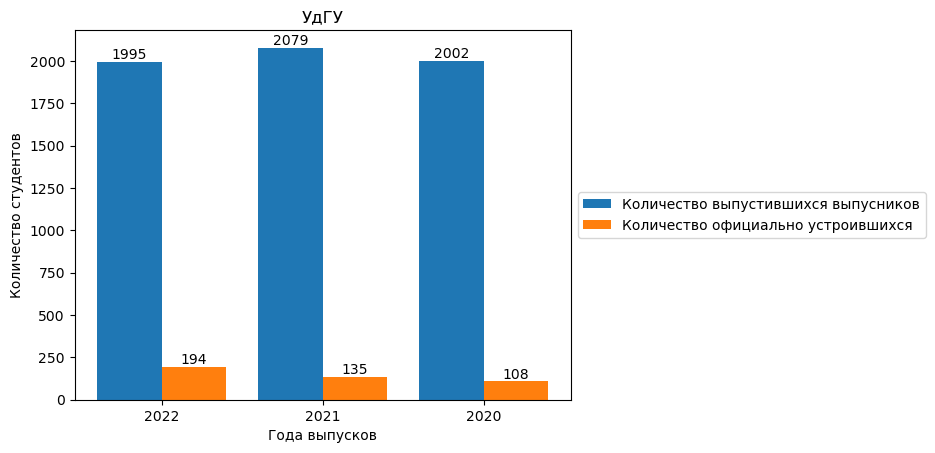

In [50]:
plt.xticks(x_indexes, ["2022", "2021", "2020"])
plt.xlabel("Года выпусков")
plt.ylabel("Количество студентов")
bar_udsu1 = plt.bar(x_indexes - (width/2), y_list1, width=width, label = "Количество выпустившихся выпусников")
bar_udsu2 = plt.bar(x_indexes + (width/2), y_list2, width=width, label = "Количество официально устроившихся")
for rect_udsu in bar_udsu1 + bar_udsu2:
    height = rect_udsu.get_height()
    plt.text(rect_udsu.get_x() + rect_udsu.get_width()/2.0, height, f'{height:.0f}', ha='center', va='bottom')  
plt.title("УдГУ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

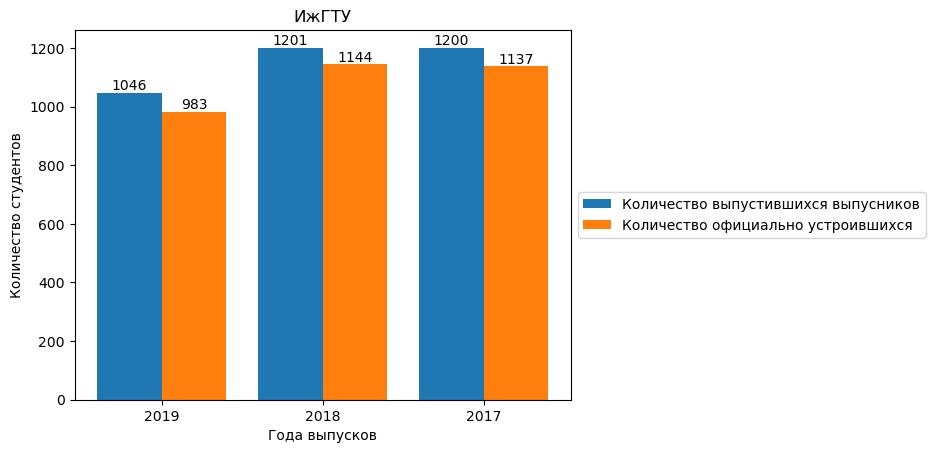

In [51]:
plt.xticks(x_indexes, ["2019", "2018", "2017"])
plt.xlabel("Года выпусков")
plt.ylabel("Количество студентов")
bar_istu1 = plt.bar(x_indexes_i - (width/2), y_list1_i, width=width, label = "Количество выпустившихся выпусников")
bar_istu2 = plt.bar(x_indexes_i + (width/2), y_list2_i, width=width, label = "Количество официально устроившихся")
for rect_istu in bar_istu1 + bar_istu2:
    height = rect_istu.get_height()
    plt.text(rect_istu.get_x() + rect_istu.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')   
plt.title("ИжГТУ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

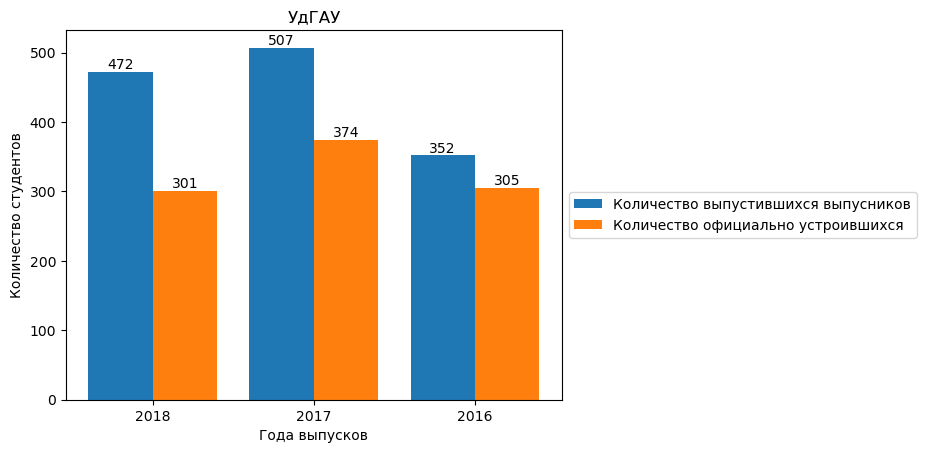

In [52]:
plt.xticks(x_indexes, ["2018", "2017", "2016"])
plt.xlabel("Года выпусков")
plt.ylabel("Количество студентов")
bar_udsau1 = plt.bar(x_indexes_a - (width/2), y_list1_a, width=width, label = "Количество выпустившихся выпусников")
bar_udsau2 = plt.bar(x_indexes_a + (width/2), y_list2_a, width=width, label = "Количество официально устроившихся")
for rect_udsau in bar_udsau1 + bar_udsau2:
    height = rect_udsau.get_height()
    plt.text(rect_udsau.get_x() + rect_udsau.get_width()/2.0, height, f'{height:.0f}', ha='center', va='bottom')  
plt.title("УдГАУ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()